In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
import pandas as pd
import pickle

rows = []

with open('Plot_comparsions_similarityv2.pkl', 'rb') as f:
    results_significance = pickle.load(f)
    
    # Iterate through the dictionary to extract the data
    for task, activities in results_significance.items():
        for activity, features in activities.items():
            for featureset, values in features.items():
                row = {
                    'dataset': task,
                    'activity': activity,
                    'featureset': featureset,
                    't-statistic': values['t-statistic'],
                    'p-value': values['p-value']
                }
                rows.append(row)

# Convert the list of rows to a dataframe
df = pd.DataFrame(rows)

df.to_csv("Plot_comparsions_similarityv2.csv", index=False)
df


dataset                                         activity  featureset  \
0    toxcast             TOX21_PPARg_BLA_antagonist_viability  structural   
1    toxcast             TOX21_PPARg_BLA_antagonist_viability       image   
2    toxcast                                  BSK_3C_MIG_down  structural   
3    toxcast                                  BSK_3C_MIG_down       image   
4    toxcast                     TOX21_VDR_BLA_Antagonist_ch1  structural   
..       ...                                              ...         ...   
659  toxcast                                BSK_LPS_TNFa_down       image   
660     BBBP                                             p_np  structural   
661     BBBP                                             p_np       image   
662    sider  Musculoskeletal and connective tissue disorders  structural   
663    sider  Musculoskeletal and connective tissue disorders       image   

     t-statistic       p-value  
0       5.872439  7.101519e-08  
1     -68.266570  2.606392e-79  
2       3.799322  2.700360e-04  
3      -0.212707  8.320591e-01  
4       8.825927  7.926101e-14  
..           ...           ...  
659     4.439698  1.765724e-05  
660   -11.839797  6.485286e-30  
661   -19.604821  3.448512e-70  
662   -13.727490  1.790781e-40  
663     0.053647  9.572238e-01  

[664 rows x 5 columns]

<Figure size 2400x1800 with 0 Axes>

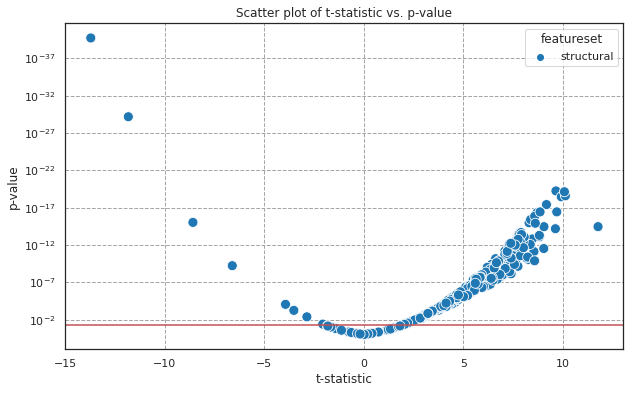

<Figure size 2400x1800 with 0 Axes>

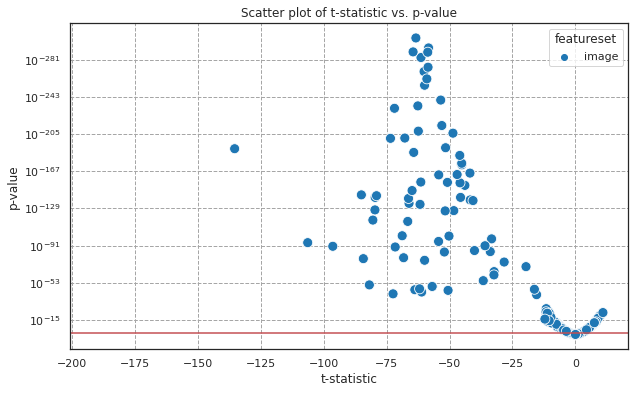

In [5]:
## Plotting
colors = {'structural': 'blue', 'image': 'green'}

for features in ['structural', 'image']:
    
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style
    
    subset = df[df['featureset'] == features]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='t-statistic', y='p-value', hue='featureset', palette='tab10', style='featureset', s=100)
    plt.yscale('log')
    plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
    plt.title('Scatter plot of t-statistic vs. p-value')
    plt.grid(True, which="both", ls="--", c='0.65')
    
    plt.axhline(y=0.05, color='r', linestyle='-')
    #plt.legend()
    plt.savefig(f'{features}_barplot_comparison.png', bbox_inches='tight')
    plt.show()
           